In [62]:
!pip install kaggle

In [63]:
import os
import json

# Specify the path to your kaggle.json file
kaggle_json_path = 'kaggle.json'

# Load the kaggle.json file
with open(kaggle_json_path, 'r') as file:
    kaggle_creds = json.load(file)

# Create the necessary directory to store kaggle.json
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# Move the kaggle.json file to the ~/.kaggle directory
with open(os.path.expanduser('~/.kaggle/kaggle.json'), 'w') as file:
    json.dump(kaggle_creds, file)

# Set the appropriate permissions
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)

# Verify the setup by checking your Kaggle datasets
!kaggle datasets list


ref                                                               title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
haseebindata/student-performance-predictions                      Student Performance Predictions                      9KB  2024-08-17 06:57:57           7393        162  0.9411765        
berkayalan/paris-2024-olympics-medals                             Paris 2024 Olympics Medals                           1KB  2024-08-14 11:02:45           6050        107  1.0              
lainguyn123/student-performance-factors                           Student Performance Factors                         94KB  2024-09-02 10:53:57           1445         40  1.0              
lainguyn123/australia-car-market-data                  

**Downloading Dataset**


In [64]:
!kaggle datasets download -d uzairkhan45/breast-cancer-patients-mris --force


Dataset URL: https://www.kaggle.com/datasets/uzairkhan45/breast-cancer-patients-mris
License(s): CC0-1.0
 86% 49.0M/56.9M [00:01<00:00, 54.2MB/s]
100% 56.9M/56.9M [00:01<00:00, 49.1MB/s]


In [65]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/breast-cancer-patients-mris.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [66]:
!ls

"Breast Cancer Patients MRI's"	 breast-cancer-patients-mris.zip   kaggle.json	 sample_data


**Impoerting Dependancies**

In [67]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
import keras.preprocessing.image

In [68]:
train_h = os.listdir('/content/Breast Cancer Patients MRI\'s/train/Healthy')
print(train_h[:5])

['H_194.jpg', 'H_451.jpg', 'H_257.jpg', 'H_750.jpg', 'H_663.jpg']


In [69]:
train_s = os.listdir('/content/Breast Cancer Patients MRI\'s/train/Sick')
print(train_s[:5])

['S_382.jpg', 'S_303.jpg', 'S_587.jpg', 'S_113.jpg', 'S_601.jpg']


In [70]:
print('number of healthy images', len(train_h))
print('number of sick images', len(train_s))

number of healthy images 700
number of sick images 700


**Making 2 classes out of the data**

Has cancer  -->  1

Doesn't have Cancer  -->  0

In [71]:
#create the labels
train_h_labels = [1]*700
train_s_labels = [0]*700

In [72]:
print(train_h_labels[:5])
print(train_s_labels[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [73]:
labels = train_h_labels + train_s_labels
print(labels[:5])
print(labels[-5:])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**displaying the images**


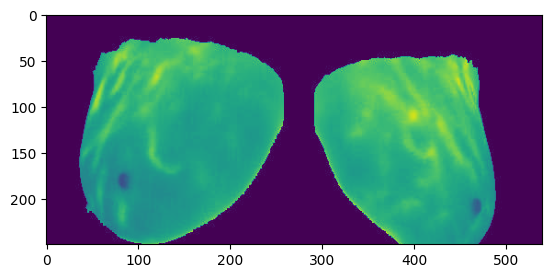

In [74]:
#disply with mask image
img = mpimg.imread('/content/Breast Cancer Patients MRI\'s/train/Healthy/H_607.jpg')
plt.imshow(img)

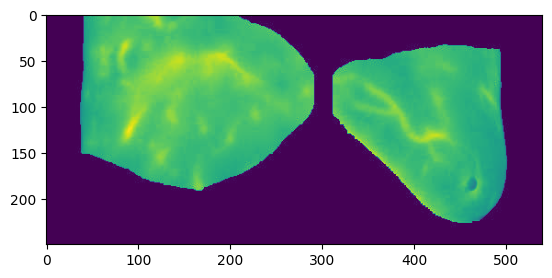

In [75]:
#disply with mask image
img = mpimg.imread('/content/Breast Cancer Patients MRI\'s/train/Sick/S_626.jpg')
plt.imshow(img)

**Image processing**

1- Resize the images

2- Convert the images to numpy arrays


In [76]:
# convert images to numpy arrays+

train_h_path = '/content/Breast Cancer Patients MRI\'s/train/Healthy/'

data = []

for img_file in train_h:

  image = Image.open(train_h_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



train_s_path = '/content/Breast Cancer Patients MRI\'s/train/Sick/'


for img_file in train_s:

  image = Image.open(train_s_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [77]:
type(data)

list

In [78]:
len(data)

1400

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
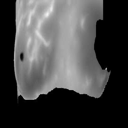

In [79]:
data[0]

In [80]:
#convert image list and label list into numpy arrays
X = np.array(data)
Y = np.array(labels)

In [81]:
type(X)
type(Y)

numpy.ndarray

In [82]:
print(X.shape)
print(Y.shape)

(1400, 128, 128, 3)
(1400,)


**Train_Test_Split**

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [85]:
print (X.shape, X_train.shape, X_test.shape)

(1400, 128, 128, 3) (1120, 128, 128, 3) (280, 128, 128, 3)


In [89]:
#scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [90]:
X_train_scaled[3]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

**Building a convolutional neuralnetwork**

In [108]:
import tensorflow as tf
from tensorflow import keras
from keras import regularizers

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Flatten())

# Making a regularization to decresae the overfitting
model.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.003)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.003)))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [109]:
#compile the neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [110]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs = 20)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - acc: 0.5084 - loss: 1.7920 - val_acc: 0.6786 - val_loss: 1.1386
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.6883 - loss: 1.0540 - val_acc: 0.7946 - val_loss: 0.8296
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.8369 - loss: 0.7689 - val_acc: 0.8571 - val_loss: 0.6728
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.9030 - loss: 0.5908 - val_acc: 0.8571 - val_loss: 0.6406
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9101 - loss: 0.5668 - val_acc: 0.9018 - val_loss: 0.5679
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.9361 - loss: 0.4712 - val_acc: 0.8929 - val_loss: 0.5360
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9520 - loss: 0.4456 - val_acc: 0.9107 - val_loss: 0.5145
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.9549 - loss: 0.4039 - val_acc: 0.9196 - val_loss: 0.4711
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.963

**Final Accuracy For Test Data**

In [111]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - acc: 0.9645 - loss: 0.3148
Test Accuracy = 0.9571428298950195


**Illustrating Loss & Accuracy**

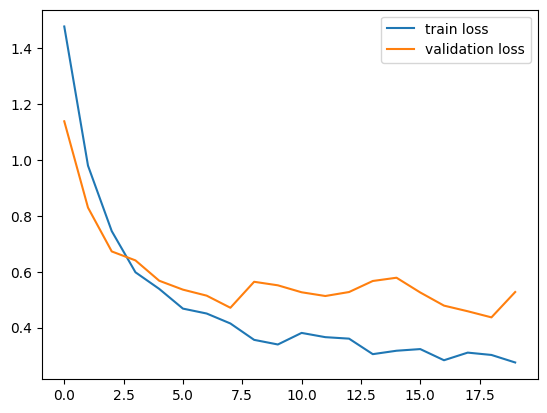

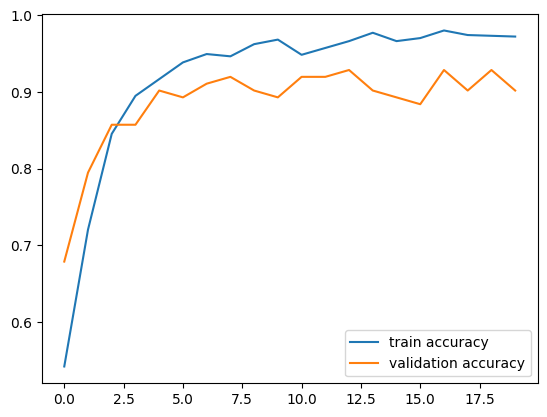

In [112]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Buildnig Predictive System**

Path of the image to be predicted: /content/Breast Cancer Patients MRI's/validation/Healthy/S_2.jpg


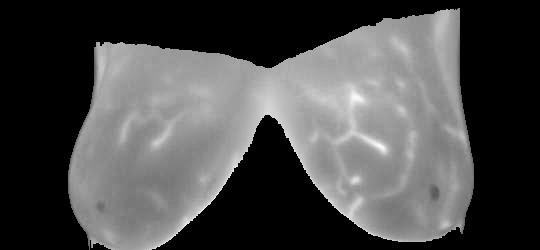

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.1559523  0.79899573]]
1
The person does not have cancer


In [122]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person does not have cancer')

else:

  print('The person has cancer')